# BPMN Process Generation

We generated 10 BPMN processes for each combination of maximum nested XOR and maximum independent XOR, ranging from 1 to 10. This resulted in a total of 1000 unique processes (10 x 10 x 10). The generation process follows these general steps:

1. Start with a seed string '_', which represents a single task.

2. Iteratively replace underscores with one of three possible structures:
   - XOR split: `(_ ^ _)`
   - Parallel split: `(_ || _)`
   - Sequential: `(_ , _)`

3. The replacement process continues until the desired complexity (in terms of nested and independent XORs) is achieved.

4. Finally, replace remaining underscores with task labels (T1, T2, etc.).

The generation process uses weighted random choices to determine which structure to use for each replacement. This allows for controlled variability in the generated processes.

Key aspects of the generation:

- The `replace_random_underscore` function (in `random_diagram_generation.py`) performs the core replacement logic.
- Probabilities for each type of replacement can be specified or randomly generated using `guess_three_numbers` (in `random_diagram_generation.py`).
- The `max_nested_xor` and `max_independent_xor` functions (in `stats.py`) are used to evaluate the complexity of the generated processes.
- The `generate_multiple_processes` function (in `random_batch_generation.py`) manages the overall generation process, ensuring the desired number of processes with specific complexities are created.

This approach ensures a diverse set of BPMN processes with varying levels of complexity, suitable for thorough testing and analysis of process-related algorithms.

Using probabilities: (0.30897909044864147, 0.2745012079212712, 0.41651970163008734)
Generated Process:
((((T1 , T2) , T3) , ((T4 || T5) || (T6 , T7))) ^ ((T8 || T9) , (T10 ^ T11)))

Max Nested XOR: 2
Max Independent XOR: 1

Process Diagram:


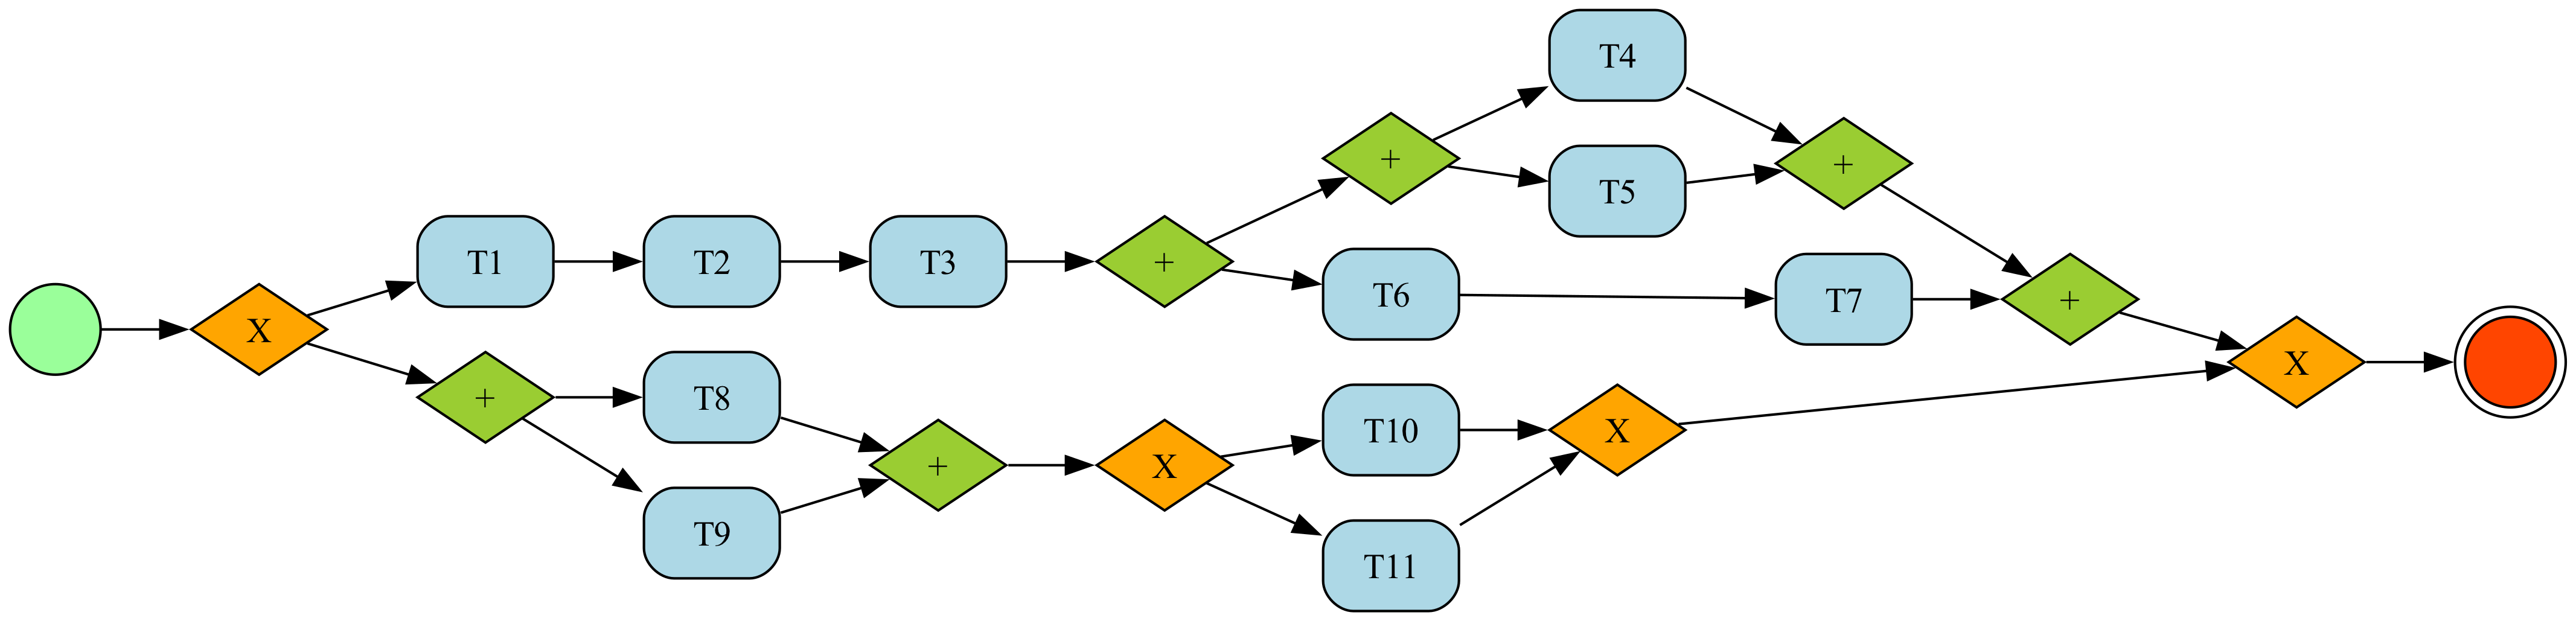

In [1]:
# Import necessary functions and modules
from random_diagram_generation import SEED_STRING, replace_random_underscore, replace_underscores, guess_three_numbers
from sese_diagram import PARSER, print_sese_diagram, print_tree, dot_tree
from stats import max_nested_xor, max_independent_xor

# Generate a process
current_string = SEED_STRING
probabilities = guess_three_numbers()
print(f"Using probabilities: {probabilities}")

iterations = 10
for _ in range(iterations):
    current_string = replace_random_underscore(current_string, probabilities)

process = replace_underscores(current_string)
print("Generated Process:")
print(process)

# Parse the process
tree = PARSER.parse(process)

# Print process statistics
print(f"\nMax Nested XOR: {max_nested_xor(process)}")
print(f"Max Independent XOR: {max_independent_xor(process)}")

# Visualize the process
print("\nProcess Diagram:")
print_sese_diagram(process)



Process Tree:


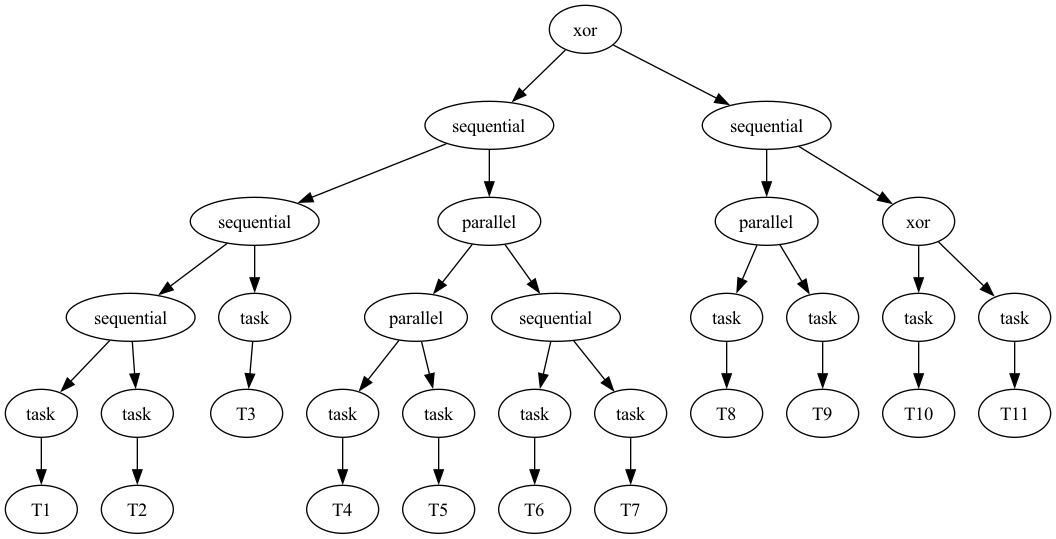

In [4]:

# Print the parse tree
print("\nProcess Tree:")
print_tree(dot_tree(tree)[0])